**Introduction to Artificial Neural Networks**

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


Saving figure perceptron_iris_plot


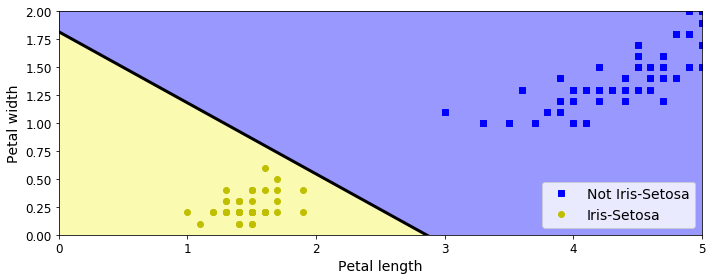

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [6]:
logit(10)

0.9999546021312976

Saving figure activation_functions_plot


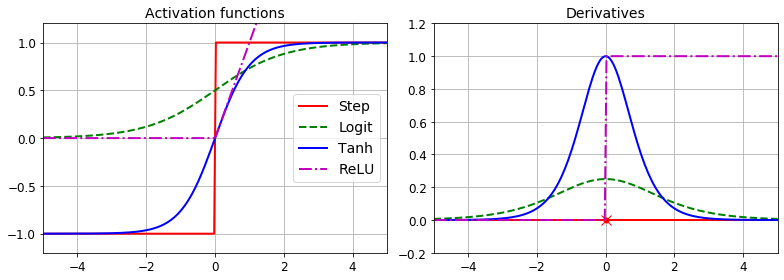

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

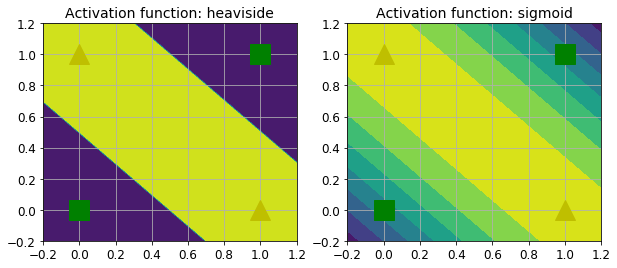

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## using tf.learn

In [10]:
#type(mnist)

In [11]:
import tensorflow as tf

In [12]:
type(tf)

tensorflow.python.util.deprecation_wrapper.DeprecationWrapper

In [13]:
#mnist == undefined

In [14]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/")

W0528 13:32:40.012711 140069117069120 deprecation.py:323] From <ipython-input-14-8e34c1162840>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0528 13:32:40.013961 140069117069120 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0528 13:32:40.015610 140069117069120 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future v

Extracting data/train-images-idx3-ubyte.gz


W0528 13:32:40.435478 140069117069120 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0528 13:32:40.551334 140069117069120 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [15]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [16]:
X_train.shape

(55000, 784)

In [17]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f63e89de160>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f63e89de940>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f63e89de9e8>)

In [18]:
X_test.shape

(10000, 784)

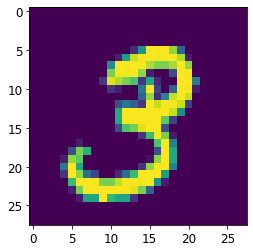

In [19]:
plt.imshow(X_train[1].reshape(28, -1))

In [20]:
y_train[1]

3

In [21]:
import tensorflow as tf

In [22]:
#feature_columns

In [23]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[200, 200, 200], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=30000)

W0528 13:32:41.249829 140069117069120 deprecation.py:323] From <ipython-input-23-cc0fb2a270de>:3: RunConfig.__init__ (from tensorflow.contrib.learn.python.learn.estimators.run_config) is deprecated and will be removed in a future version.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
W0528 13:32:41.251499 140069117069120 deprecation.py:323] From <ipython-input-23-cc0fb2a270de>:5: infer_real_valued_columns_from_input (from tensorflow.contrib.learn.python.learn.estimators.estimator) is deprecated and will be removed in a future version.
Instructions for updating:
Please specify feature columns explicitly.
W0528 13:32:41.252579 140069117069120 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py:143: setup_train_data_feeder (from tensorflow.contrib.learn.python.learn.learn_io.data_feeder) is deprecated and will be removed in a future version.
Instruc

SKCompat()

In [24]:
feature_cols

[_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)]

In [25]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

W0528 13:34:16.950898 140069117069120 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


0.9822

In [26]:
a = y_test == y_pred['classes']
i = 0;
for j in a:
    if j == 0:
        print(i)
        print("Predicted:")
        print(y_pred['classes'][i])
        print("Actual:")
        print(y_test[i])
        print("-----")
        if i > 1000:
            break
    i += 1


115
Predicted:
9
Actual:
4
-----
149
Predicted:
5
Actual:
2
-----
247
Predicted:
2
Actual:
4
-----
321
Predicted:
7
Actual:
2
-----
340
Predicted:
3
Actual:
5
-----
381
Predicted:
7
Actual:
3
-----
445
Predicted:
0
Actual:
6
-----
449
Predicted:
5
Actual:
3
-----
495
Predicted:
2
Actual:
8
-----
582
Predicted:
2
Actual:
8
-----
619
Predicted:
8
Actual:
1
-----
646
Predicted:
6
Actual:
2
-----
659
Predicted:
7
Actual:
2
-----
720
Predicted:
8
Actual:
5
-----
877
Predicted:
6
Actual:
8
-----
900
Predicted:
3
Actual:
1
-----
947
Predicted:
9
Actual:
8
-----
951
Predicted:
4
Actual:
5
-----
965
Predicted:
0
Actual:
6
-----
1014
Predicted:
5
Actual:
6
-----


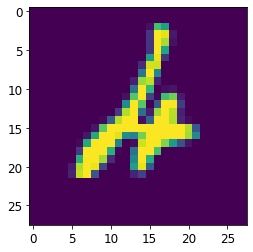

In [27]:
plt.imshow(X_test[247].reshape(28, 28))

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [29]:
type(matplotlib)

module

In [30]:
plt.__name__

'matplotlib.pyplot'

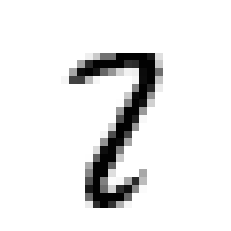

In [31]:
some_digit = X_test[321]   # Selecting the 36,000th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [32]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07848147135794481

## Using plain TensorFlow

#### Construction phase

In [33]:
len(X_train[0])

784

In [34]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 150
n_hidden2 = 150
n_outputs = 10


**Defining placeholders**

In [35]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

**Let's define a function for creating the layers of out DNN**

In [36]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [37]:
import tensorflow as tf
y = tf.nn.relu(0.6)
with tf.Session() as s:
    print(y.eval())

0.6


In [38]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

**Using dense instead of neuron_layer function()**

In [39]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [40]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                          activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                          activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

W0528 13:34:17.879048 140069117069120 deprecation.py:323] From <ipython-input-40-56996712a747>:3: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0528 13:34:17.881781 140069117069120 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Defining the loss function**

In [41]:
# For regression:
# with tf.name_scope("regloss"):
#     loss = tf.reduce_mean(tf.square(y-logits), name="regloss")

In [42]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

**Defining the gradient descent optimizer**

In [43]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

**Specifying how to evaluate the model**

In [44]:
result = tf.nn.in_top_k([[0.1, 0.8, 0.3, 0.6, 0.5]], [4], 2)
with tf.Session() as s:
    print(result.eval())

[False]


In [45]:
np.argmax([0.1, 0.9, 0.3, 0.2, 0.5, 0.8])

1

In [46]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

**Initialize variables and create saver**

In [47]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

**Define the number of epochs**

In [48]:
n_epochs = 40
batch_size = 50

**Train the model**

In [49]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "model_ckps/my_model_final.ckpt")

0 Train accuracy: 0.88 Val accuracy: 0.8942
1 Train accuracy: 0.92 Val accuracy: 0.917
2 Train accuracy: 0.9 Val accuracy: 0.9288
3 Train accuracy: 0.96 Val accuracy: 0.9352
4 Train accuracy: 0.92 Val accuracy: 0.9442
5 Train accuracy: 0.92 Val accuracy: 0.9474
6 Train accuracy: 0.94 Val accuracy: 0.9516
7 Train accuracy: 0.96 Val accuracy: 0.9564
8 Train accuracy: 0.92 Val accuracy: 0.9568
9 Train accuracy: 0.94 Val accuracy: 0.9604
10 Train accuracy: 0.98 Val accuracy: 0.9626
11 Train accuracy: 0.92 Val accuracy: 0.9642
12 Train accuracy: 0.98 Val accuracy: 0.9654
13 Train accuracy: 0.94 Val accuracy: 0.9656
14 Train accuracy: 1.0 Val accuracy: 0.9656
15 Train accuracy: 0.98 Val accuracy: 0.968
16 Train accuracy: 0.98 Val accuracy: 0.9692
17 Train accuracy: 0.94 Val accuracy: 0.9702
18 Train accuracy: 0.98 Val accuracy: 0.9704
19 Train accuracy: 0.98 Val accuracy: 0.9712
20 Train accuracy: 1.0 Val accuracy: 0.9708
21 Train accuracy: 1.0 Val accuracy: 0.9722
22 Train accuracy: 1.0 Val

**Using the Neural Network**

In [50]:
with tf.Session() as sess:
    saver.restore(sess, "model_ckps/my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

In [51]:
!ls -l model_ckps/

total 8108
-rw-r--r-- 1 rajtilakbhattacharjee7947 rajtilakbhattacharjee7947      95 May 28 13:35 checkpoint
-rw-r--r-- 1 rajtilakbhattacharjee7947 rajtilakbhattacharjee7947  606020 May 15 08:41 my_dropout_time_series_model.data-00000-of-00001
-rw-r--r-- 1 rajtilakbhattacharjee7947 rajtilakbhattacharjee7947     975 May 15 08:41 my_dropout_time_series_model.index
-rw-r--r-- 1 rajtilakbhattacharjee7947 rajtilakbhattacharjee7947  240702 May 15 08:41 my_dropout_time_series_model.meta
-rw-r--r-- 1 rajtilakbhattacharjee7947 rajtilakbhattacharjee7947 2642816 May 28 13:26 my_mnist_model.data-00000-of-00001
-rw-r--r-- 1 rajtilakbhattacharjee7947 rajtilakbhattacharjee7947     935 May 28 13:26 my_mnist_model.index
-rw-r--r-- 1 rajtilakbhattacharjee7947 rajtilakbhattacharjee7947   65754 May 28 13:26 my_mnist_model.meta
-rw-r--r-- 1 rajtilakbhattacharjee7947 rajtilakbhattacharjee7947      36 May 19 08:13 my_model.ckpt.data-00000-of-00001
-rw-r--r-- 1 rajtilakbhattacharjee7947 rajtilakbhattacharjee79

In [52]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [53]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [54]:
show_graph(tf.get_default_graph())